In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.pyplot import cm


import warnings
warnings.filterwarnings('ignore')


# set up formatting for x axis time values
monthfmt = DateFormatter("%b")
yearfmt = DateFormatter("%Y")

def combinedfmt(x,pos):
    string = monthfmt(x)
    if string == "Jan":
        string += "\n" + yearfmt(x)
    return string

def format_date_ax(ax):
    ax.xaxis.set_major_locator(MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(FuncFormatter(combinedfmt))
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center');
    return None

def format_date_ax2(ax):
    months = MonthLocator(interval=1)
    months_fmt = DateFormatter('%b')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    return None

---

Open summary stats that were computed in `plot-raster-datasets.ipynb`

#### Original GOES ABI Brightness Temperature Summary Statistics

In [101]:
# open csv file with summary stats
df_original_tb = pd.read_csv('goes_modis_aster_original_tb_summary_stats.csv')
# set datetime to aster_datetime
df_original_tb['datetime'] = pd.to_datetime(df_original_tb.time.copy())
# uset this as the index
df_original_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_original_tb['ast_mod_r2_value'] = df_original_tb.ast_mod_r_value.copy()**2
df_original_tb['ast_goes_r2_value'] = df_original_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 40000
df_original_tb = df_original_tb[df_original_tb.ast_mod_n >= 40000]

# Drop observation from 2019-05-13 18:51:22 (cloudy)
#drop_idx_list = [df_original_tb.index[i] for i in [14]]
#df_original_tb.drop(drop_idx_list, inplace=True)

# preview
#df_original_tb.head(1)

#### Orthorectified GOES ABI Brightness Temperature Summary Statistics

In [102]:
# open csv file with summary stats
df_ortho_tb = pd.read_csv('goes_modis_aster_orthorectified_tb_summary_stats.csv')
# set datetime to aster_datetime
df_ortho_tb['datetime'] = pd.to_datetime(df_ortho_tb.time.copy())
# uset this as the index
df_ortho_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_ortho_tb['ast_mod_r2_value'] = df_ortho_tb.ast_mod_r_value.copy()**2
df_ortho_tb['ast_goes_r2_value'] = df_ortho_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 40000
df_ortho_tb = df_ortho_tb[df_ortho_tb.ast_mod_n >= 40000]
# Drop observation from 2019-05-13 18:51:22 (cloudy)
#df_ortho_tb.drop(drop_idx_list, inplace=True)
# preview
#df_ortho_tb.head(1)

In [104]:
df_original_tb.ast_mod_n

datetime
2017-04-21 18:51:07     46072
2017-05-23 18:51:10    110485
2017-06-07 06:07:10     77552
2017-06-07 06:07:19     53858
2017-06-16 06:01:08    108768
2018-03-23 18:51:27     40835
2018-04-08 18:51:46     65086
2018-05-17 18:58:31    121037
2018-11-26 06:01:19    115315
2018-12-19 06:07:13     77483
2018-12-19 06:07:22     53911
2019-01-13 06:01:10    114805
2019-03-26 18:51:20     46507
2019-04-27 18:51:22    110509
2019-05-28 06:07:18     77594
2019-05-28 06:07:27     53818
2019-06-13 06:07:13     77447
2019-06-13 06:07:22     53734
2020-01-07 06:06:41     77551
2020-01-07 06:06:50     53856
2020-01-23 06:06:58     76620
2020-01-23 06:07:07     53834
2020-02-01 06:01:09     66889
2020-02-08 06:07:29     52850
2020-02-26 05:55:25    105262
2020-04-13 18:51:17    109995
Name: ast_mod_n, dtype: int64

In [105]:
df_original_tb.ast_goes_mean_diff

datetime
2017-04-21 18:51:07    3.108516
2017-05-23 18:51:10    3.160059
2017-06-07 06:07:10    1.479827
2017-06-07 06:07:19    0.276015
2017-06-16 06:01:08    0.486405
2018-03-23 18:51:27    2.171887
2018-04-08 18:51:46    4.949046
2018-05-17 18:58:31    2.353981
2018-11-26 06:01:19    1.468274
2018-12-19 06:07:13    2.227015
2018-12-19 06:07:22    1.153600
2019-01-13 06:01:10    1.221219
2019-03-26 18:51:20   -5.682843
2019-04-27 18:51:22    4.608244
2019-05-28 06:07:18    0.571523
2019-05-28 06:07:27   -1.198350
2019-06-13 06:07:13    0.724617
2019-06-13 06:07:22    0.842150
2020-01-07 06:06:41    1.883983
2020-01-07 06:06:50    0.792513
2020-01-23 06:06:58    2.136701
2020-01-23 06:07:07    0.771008
2020-02-01 06:01:09    1.317154
2020-02-08 06:07:29    1.260472
2020-02-26 05:55:25    1.322041
2020-04-13 18:51:17    3.400417
Name: ast_goes_mean_diff, dtype: float64

---

### Plot Brightness Temperature Summary Stats Together

In [106]:
# Make difference dataframe

### By how much and in what direction did dT change?
# `df_change_tb.ast_goes_mean_diff` change in mean-difference-per-image gives sign and magnitude of change
df_change_tb = df_ortho_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath']) - \
               df_original_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath'])

### By how much did it change?
#`df_change_tb.abs_ast_goes_mean_diff` absolute of change in mean-difference-per-image just gives magnitude of change
df_change_tb['abs_ast_goes_mean_diff'] = df_change_tb.ast_goes_mean_diff.abs()

### Did it get any closer to zero? (yes if < 0, no if > 0)
#`df_change_tb.ast_goes_abs_mean_diff` change in absolute mean-difference-per-image just tells us if difference got closer to zero or not
df_change_tb['ast_goes_abs_mean_diff'] = df_ortho_tb.ast_goes_mean_diff.abs() - df_original_tb.ast_goes_mean_diff.abs()

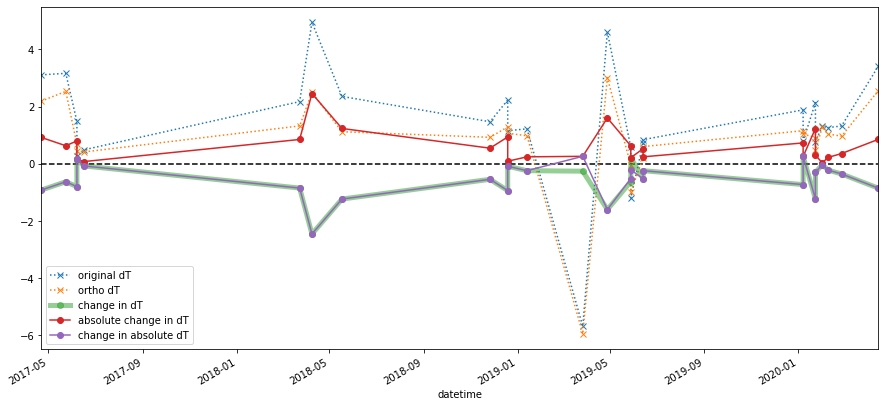

In [109]:
plt.figure(figsize=(15,7))


df_original_tb.ast_goes_mean_diff.plot(linestyle=':', marker='x', label='original dT',zorder=-998)
df_ortho_tb.ast_goes_mean_diff.plot(linestyle=':', marker='x', label='ortho dT',zorder=-997)

df_change_tb.ast_goes_mean_diff.plot(linestyle='-',lw=5, marker='o', alpha=0.5, label='change in dT')
df_change_tb.abs_ast_goes_mean_diff.plot(linestyle='-', marker='o', label='absolute change in dT')
df_change_tb.ast_goes_abs_mean_diff.plot(linestyle='-', marker='o', label='change in absolute dT')

plt.axhline(0,ls='--',c='k',zorder=-999)
plt.legend()

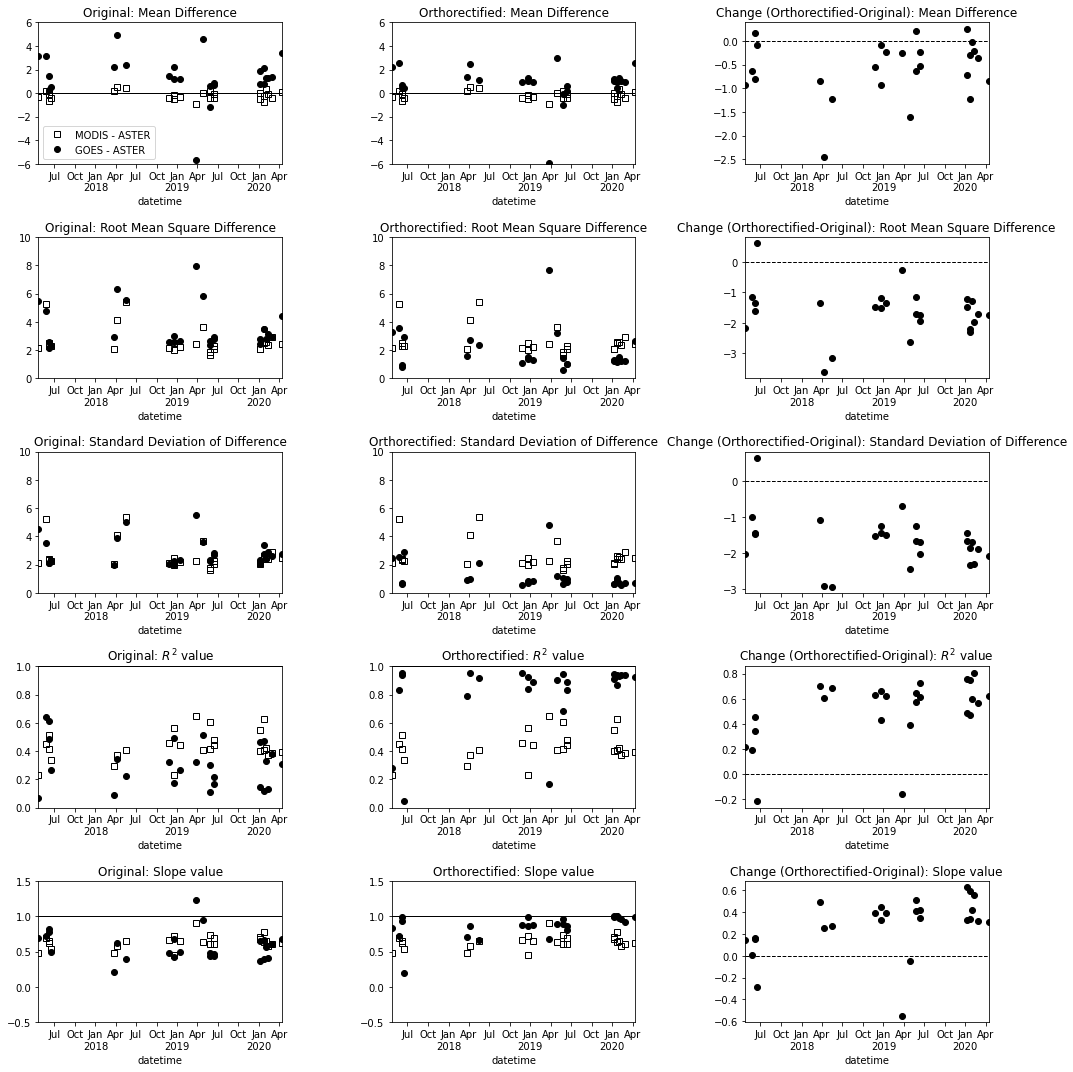

In [110]:
fig, axes = plt.subplots(5,3,figsize=(15,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[0], label='MODIS - ASTER')
df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k',  ax=ax[0], label='GOES - ASTER')
ax[0].set_title('Original: Mean Difference')
ax[0].set_ylim(-6,6)
ax[0].axhline(0,c='k',linewidth=1)
ax[0].legend()

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[3], label='MODIS - ASTER')
df_original_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[3],  label='GOES - ASTER')
ax[3].set_title('Original: Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='k',linewidth=1)

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[6], label='MODIS - ASTER')
df_original_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[6],  label='GOES - ASTER')
ax[6].set_title('Original: Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[9], label='MODIS : ASTER')
df_original_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[9],  label='GOES : ASTER')
ax[9].set_title('Original: $R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='k',linewidth=1)

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[12], label='MODIS : ASTER')
df_original_tb.ast_goes_slope.plot(linestyle='none',marker='o',  c='k', ax=ax[12],  label='GOES : ASTER')
ax[12].set_title('Original: Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='k',linewidth=1)

### Orthorectified stats

df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[1], label='MODIS - ASTER')
df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[1], label='GOES - ASTER')
ax[1].set_title('Orthorectified: Mean Difference')
ax[1].set_ylim(-6,6)
ax[1].axhline(0,c='k',linewidth=1)

df_ortho_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[4], label='MODIS - ASTER')
df_ortho_tb.ast_goes_rms_diff.plot(linestyle='none',marker='o',  c='k', ax=ax[4],  label='GOES - ASTER')
ax[4].set_title('Orthorectified: Root Mean Square Difference')
ax[4].set_ylim(0,10)
ax[4].axhline(0,c='k',linewidth=1)

df_ortho_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[7], label='MODIS - ASTER')
df_ortho_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[7],  label='GOES - ASTER')
ax[7].set_title('Orthorectified: Standard Deviation of Difference')
ax[7].set_ylim(0,10)

df_ortho_tb.ast_mod_r2_value.plot(linestyle='none',marker='s',  mfc='none', mec='k', ax=ax[10], label='MODIS : ASTER')
df_ortho_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[10],  label='GOES : ASTER')
ax[10].set_title('Orthorectified: $R^2$ value')
ax[10].set_ylim(0,1)
ax[10].axhline(1,c='k',linewidth=1)

df_ortho_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[13], label='MODIS : ASTER')
df_ortho_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[13],  label='GOES : ASTER')
ax[13].set_title('Orthorectified: Slope value')
ax[13].set_ylim(-0.5,1.5)
ax[13].axhline(1,c='k',linewidth=1)


### Change (original - ortho) stats
# skipping MODIS - ASTER since there is no change
df_change_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[2], label='GOES - ASTER')
ax[2].set_title('Change (Orthorectified-Original): Mean Difference')
#ax[2].set_ylim(-3,3)
ax[2].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[5],  label='GOES - ASTER')
ax[5].set_title('Change (Orthorectified-Original): Root Mean Square Difference')
#ax[5].set_ylim(-5,5)
ax[5].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[8],  label='GOES - ASTER')
ax[8].set_title('Change (Orthorectified-Original): Standard Deviation of Difference')
#ax[8].set_ylim(-5,5)
ax[8].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[11],  label='GOES : ASTER')
ax[11].set_title('Change (Orthorectified-Original): $R^2$ value')
#ax[11].set_ylim(-1,1)
ax[11].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[14],  label='GOES : ASTER')
ax[14].set_title('Change (Orthorectified-Original): Slope value')
#ax[14].set_ylim(-1,1)
ax[14].axhline(0,c='k',linestyle='--',linewidth=1)

for this_ax in ax:
    format_date_ax(this_ax)
    #this_ax.legend(loc='best')

### When do the largest (absolute value) mean differences occur?
These would be the larges biases (either positive or negative, I've taken the absolute value here so double check direction of bias)

In [66]:
print('When do the maximum mean differences between MODIS and ASTER image pairs occur (the baseline)?\n{}'.format(df_original_tb.ast_mod_mean_diff.abs().sort_values(ascending=False).head()))
print('When do the maximum mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?\n{}'.format(df_original_tb.ast_goes_mean_diff.abs().sort_values(ascending=False).head()))
print('When do the maximum mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?\n{}'.format(df_ortho_tb.ast_goes_mean_diff.abs().sort_values(ascending=False).head()))
print('\n')

When do the maximum mean differences between MODIS and ASTER image pairs occur (the baseline)?
datetime
2019-03-26 18:51:20    0.941995
2020-01-23 06:06:58    0.723017
2017-06-07 06:07:10    0.654649
2018-04-08 18:51:46    0.544864
2020-01-07 06:06:41    0.503547
Name: ast_mod_mean_diff, dtype: float64
When do the maximum mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?
datetime
2019-03-26 18:51:20    5.682843
2018-04-08 18:51:46    4.949046
2019-04-27 18:51:22    4.608244
2020-04-13 18:51:17    3.400417
2017-05-23 18:51:10    3.160059
Name: ast_goes_mean_diff, dtype: float64
When do the maximum mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?
datetime
2019-03-26 18:51:20    5.942865
2019-04-27 18:51:22    3.007525
2020-04-13 18:51:17    2.549735
2017-05-23 18:51:10    2.530508
2018-04-08 18:51:46    2.493130
Name: ast_goes_mean_diff, dtype: float64




### When do the smallest (absolute value) mean differences occur?
These would be the smallest biases (either positive or negative, I've taken the absolute value here so double check direction of bias)

In [63]:
print('When do the minimum mean differences between MODIS and ASTER image pairs occur (the baseline)?\n{}'.format(df_original_tb.ast_mod_mean_diff.abs().sort_values(ascending=True).head()))
print('When do the minimum mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?\n{}'.format(df_original_tb.ast_goes_mean_diff.abs().sort_values(ascending=True).head()))
print('When do the minimum mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?\n{}'.format(df_ortho_tb.ast_goes_mean_diff.abs().sort_values(ascending=True).head()))
print('\n')

When do the minimum mean differences between MODIS and ASTER image pairs occur (the baseline)?
datetime
2020-01-07 06:06:50    0.002529
2019-04-27 18:51:22    0.039296
2020-04-13 18:51:17    0.090530
2019-06-13 06:07:22    0.110068
2020-02-08 06:07:29    0.110795
Name: ast_mod_mean_diff, dtype: float64
When do the minimum mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?
datetime
2017-06-07 06:07:19    0.276015
2017-06-16 06:01:08    0.486405
2019-05-28 06:07:18    0.571523
2019-06-13 06:07:13    0.724617
2020-01-23 06:07:07    0.771008
Name: ast_goes_mean_diff, dtype: float64
When do the minimum mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?
datetime
2019-05-28 06:07:18    0.053049
2019-06-13 06:07:13    0.198268
2017-06-16 06:01:08    0.410460
2017-06-07 06:07:19    0.435335
2020-01-23 06:07:07    0.467846
Name: ast_goes_mean_diff, dtype: float64




### When do the maximum (positive) mean differences occur?
These would be the largest biases in the positive direction.

In [64]:
print('When do the maximum (positive) mean differences between MODIS and ASTER image pairs occur (the baseline)?\n{}'.format(df_original_tb.ast_mod_mean_diff.sort_values(ascending=False).head()))
print('When do the maximum (positive) mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?\n{}'.format(df_original_tb.ast_goes_mean_diff.sort_values(ascending=False).head()))
print('When do the maximum (positive) mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?\n{}'.format(df_ortho_tb.ast_goes_mean_diff.sort_values(ascending=False).head()))
print('\n')

When do the maximum (positive) mean differences between MODIS and ASTER image pairs occur (the baseline)?
datetime
2018-04-08 18:51:46    0.544864
2018-05-17 18:58:31    0.419978
2020-02-01 06:01:09    0.309428
2018-03-23 18:51:27    0.185738
2019-05-28 06:07:27    0.175794
Name: ast_mod_mean_diff, dtype: float64
When do the maximum (positive) mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?
datetime
2018-04-08 18:51:46    4.949046
2019-04-27 18:51:22    4.608244
2020-04-13 18:51:17    3.400417
2017-05-23 18:51:10    3.160059
2017-04-21 18:51:07    3.108516
Name: ast_goes_mean_diff, dtype: float64
When do the maximum (positive) mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?
datetime
2019-04-27 18:51:22    3.007525
2020-04-13 18:51:17    2.549735
2017-05-23 18:51:10    2.530508
2018-04-08 18:51:46    2.493130
2017-04-21 18:51:07    2.186727
Name: ast_goes_mean_diff, dtype: float64




### When do the minium (negative) mean differences occur?
These would be the largest biases in the negative direction.

In [65]:
print('When do the minimum (negative) mean differences between MODIS and ASTER image pairs occur (the baseline)?\n{}'.format(df_original_tb.ast_mod_mean_diff.sort_values(ascending=True).head()))
print('When do the minimum (negative)  mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?\n{}'.format(df_original_tb.ast_goes_mean_diff.sort_values(ascending=True).head()))
print('When do the minimum (negative) mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?\n{}'.format(df_ortho_tb.ast_goes_mean_diff.sort_values(ascending=True).head()))
print('\n')

When do the minimum (negative) mean differences between MODIS and ASTER image pairs occur (the baseline)?
datetime
2019-03-26 18:51:20   -0.941995
2020-01-23 06:06:58   -0.723017
2017-06-07 06:07:10   -0.654649
2020-01-07 06:06:41   -0.503547
2018-12-19 06:07:13   -0.480709
Name: ast_mod_mean_diff, dtype: float64
When do the minimum (negative)  mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?
datetime
2019-03-26 18:51:20   -5.682843
2019-05-28 06:07:27   -1.198350
2017-06-07 06:07:19    0.276015
2017-06-16 06:01:08    0.486405
2019-05-28 06:07:18    0.571523
Name: ast_goes_mean_diff, dtype: float64
When do the minimum (negative) mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?
datetime
2019-03-26 18:51:20   -5.942865
2019-05-28 06:07:27   -0.985347
2019-05-28 06:07:18   -0.053049
2019-06-13 06:07:13    0.198268
2017-06-16 06:01:08    0.410460
Name: ast_goes_mean_diff, dtype: float64




### By how much and in what direction did deltaT change?
orthorectified - original

(sign of change here __does not__ tell us whether abs(deltaT) was reduced or increased)

In [115]:
print('Change in deltaT:\n{}'.format(df_change_tb.ast_goes_mean_diff.sort_values(ascending=False)))
print('\n')

Change in deltaT:
datetime
2020-01-07 06:06:50    0.254998
2019-05-28 06:07:27    0.213003
2017-06-07 06:07:19    0.159321
2020-02-01 06:01:09   -0.027444
2017-06-16 06:01:08   -0.075945
2018-12-19 06:07:22   -0.088081
2020-02-08 06:07:29   -0.218621
2019-06-13 06:07:22   -0.241842
2019-01-13 06:01:10   -0.241846
2019-03-26 18:51:20   -0.260022
2020-01-23 06:07:07   -0.303161
2020-02-26 05:55:25   -0.357467
2019-06-13 06:07:13   -0.526349
2018-11-26 06:01:19   -0.544202
2019-05-28 06:07:18   -0.624572
2017-05-23 18:51:10   -0.629551
2020-01-07 06:06:41   -0.728143
2017-06-07 06:07:10   -0.798269
2018-03-23 18:51:27   -0.849127
2020-04-13 18:51:17   -0.850682
2017-04-21 18:51:07   -0.921789
2018-12-19 06:07:13   -0.938095
2020-01-23 06:06:58   -1.232266
2018-05-17 18:58:31   -1.233891
2019-04-27 18:51:22   -1.600719
2018-04-08 18:51:46   -2.455916
Name: ast_goes_mean_diff, dtype: float64




### Which images had the largest changes of deltaT due to orthorectification?
abs(orthorectified - original)

This shows us by how much deltaT changed, though still not if the change was an improvement or not.

In [112]:
print('GOES imagery at what time of year had the largest change due to orthorectification\n{}'.format(df_change_tb.abs_ast_goes_mean_diff.sort_values(ascending=False)))
print('\n')

GOES imagery at what time of year had the largest change due to orthorectification
datetime
2018-04-08 18:51:46    2.455916
2019-04-27 18:51:22    1.600719
2018-05-17 18:58:31    1.233891
2020-01-23 06:06:58    1.232266
2018-12-19 06:07:13    0.938095
2017-04-21 18:51:07    0.921789
2020-04-13 18:51:17    0.850682
2018-03-23 18:51:27    0.849127
2017-06-07 06:07:10    0.798269
2020-01-07 06:06:41    0.728143
2017-05-23 18:51:10    0.629551
2019-05-28 06:07:18    0.624572
2018-11-26 06:01:19    0.544202
2019-06-13 06:07:13    0.526349
2020-02-26 05:55:25    0.357467
2020-01-23 06:07:07    0.303161
2019-03-26 18:51:20    0.260022
2020-01-07 06:06:50    0.254998
2019-01-13 06:01:10    0.241846
2019-06-13 06:07:22    0.241842
2020-02-08 06:07:29    0.218621
2019-05-28 06:07:27    0.213003
2017-06-07 06:07:19    0.159321
2018-12-19 06:07:22    0.088081
2017-06-16 06:01:08    0.075945
2020-02-01 06:01:09    0.027444
Name: abs_ast_goes_mean_diff, dtype: float64




### Which images did not improve due to orthorectification
where abs(ortho) - abs(original) > 0 we did not have an improvement, where it is < 0 there is an improvement

In [114]:
print('GOES imagery that didnt improve due to orthorectification\n{}'.format(df_change_tb.ast_goes_abs_mean_diff.sort_values(ascending=False)))
print('\n')

GOES imagery that didnt improve due to orthorectification
datetime
2019-03-26 18:51:20    0.260022
2020-01-07 06:06:50    0.254998
2017-06-07 06:07:19    0.159321
2020-02-01 06:01:09   -0.027444
2017-06-16 06:01:08   -0.075945
2018-12-19 06:07:22   -0.088081
2019-05-28 06:07:27   -0.213003
2020-02-08 06:07:29   -0.218621
2019-06-13 06:07:22   -0.241842
2019-01-13 06:01:10   -0.241846
2020-01-23 06:07:07   -0.303161
2020-02-26 05:55:25   -0.357467
2019-05-28 06:07:18   -0.518474
2019-06-13 06:07:13   -0.526349
2018-11-26 06:01:19   -0.544202
2017-05-23 18:51:10   -0.629551
2020-01-07 06:06:41   -0.728143
2017-06-07 06:07:10   -0.798269
2018-03-23 18:51:27   -0.849127
2020-04-13 18:51:17   -0.850682
2017-04-21 18:51:07   -0.921789
2018-12-19 06:07:13   -0.938095
2020-01-23 06:06:58   -1.232266
2018-05-17 18:58:31   -1.233891
2019-04-27 18:51:22   -1.600719
2018-04-08 18:51:46   -2.455916
Name: ast_goes_abs_mean_diff, dtype: float64




### Taking a closer look at the images that didn't improve with orthorectification

In [117]:
print('Three images pairs didnt improve their mean difference values, what were those values before and after?')
print(df_original_tb.loc[pd.Timestamp('2020-01-07 06:06:50')].ast_goes_mean_diff, '-->', df_ortho_tb.loc[pd.Timestamp('2020-01-07 06:06:50')].ast_goes_mean_diff)
print(df_original_tb.loc[pd.Timestamp('2019-03-26 18:51:20')].ast_goes_mean_diff, '-->', df_ortho_tb.loc[pd.Timestamp('2019-03-26 18:51:20')].ast_goes_mean_diff)
print(df_original_tb.loc[pd.Timestamp('2017-06-07 06:07:19')].ast_goes_mean_diff, '-->', df_ortho_tb.loc[pd.Timestamp('2017-06-07 06:07:19')].ast_goes_mean_diff)
print('\n')

print('Three image pairs didnt improve their mean difference values, but how do their standard deviations look?')
print('What were their original standard deviations of difference?')
print(df_original_tb.loc[pd.Timestamp('2020-01-07 06:06:50')].ast_goes_std_diff)
print(df_original_tb.loc[pd.Timestamp('2019-03-26 18:51:20')].ast_goes_std_diff)
print(df_original_tb.loc[pd.Timestamp('2017-06-07 06:07:19')].ast_goes_std_diff)

print('What were their new standard deviations of difference?')
print(df_ortho_tb.loc[pd.Timestamp('2020-01-07 06:06:50')].ast_goes_std_diff)
print(df_ortho_tb.loc[pd.Timestamp('2019-03-26 18:51:20')].ast_goes_std_diff)
print(df_ortho_tb.loc[pd.Timestamp('2017-06-07 06:07:19')].ast_goes_std_diff)

Three images pairs didnt improve their mean difference values, what were those values before and after?
0.7925130012090484 --> 1.0475105353252978
-5.682842907580986 --> -5.9428645726427725
0.2760148532026401 --> 0.4353354025274421


Three image pairs didnt improve their mean difference values, but how do their standard deviations look?
What were their original standard deviations of difference?
2.3165099768178083
5.536829899322036
2.1184149336325793
What were their new standard deviations of difference?
0.6598613463172209
4.836140288588474
0.6498958156756192


### Look at r-squared:

In [118]:
print('Change in R-squared sorted:\n{}'.format(df_change_tb.ast_goes_r2_value.sort_values(ascending=False)))
print('\n')

Change in R-squared sorted:
datetime
2020-02-08 06:07:29    0.808028
2020-01-07 06:06:50    0.760153
2020-01-23 06:07:07    0.748175
2019-06-13 06:07:22    0.721843
2018-03-23 18:51:27    0.699519
2018-05-17 18:58:31    0.688793
2018-12-19 06:07:22    0.661514
2019-05-28 06:07:18    0.645394
2018-11-26 06:01:19    0.628730
2019-01-13 06:01:10    0.621162
2020-04-13 18:51:17    0.619003
2019-06-13 06:07:13    0.616142
2018-04-08 18:51:46    0.604722
2020-02-01 06:01:09    0.595051
2019-05-28 06:07:27    0.571484
2020-02-26 05:55:25    0.563291
2020-01-07 06:06:41    0.482070
2020-01-23 06:06:58    0.466883
2017-06-07 06:07:19    0.452649
2018-12-19 06:07:13    0.432686
2019-04-27 18:51:22    0.388805
2017-06-07 06:07:10    0.340386
2017-04-21 18:51:07    0.211442
2017-05-23 18:51:10    0.191402
2019-03-26 18:51:20   -0.160845
2017-06-16 06:01:08   -0.218395
Name: ast_goes_r2_value, dtype: float64




### Look at standard deviations:

In [119]:
print('Change in standard deviation sorted:\n{}'.format(df_change_tb.ast_goes_std_diff.sort_values(ascending=False)))

Change in standard deviation sorted:
datetime
2017-06-16 06:01:08    0.642227
2019-03-26 18:51:20   -0.700690
2017-05-23 18:51:10   -0.986877
2018-03-23 18:51:27   -1.075941
2019-05-28 06:07:27   -1.232231
2018-12-19 06:07:13   -1.254880
2018-12-19 06:07:22   -1.435412
2017-06-07 06:07:10   -1.443131
2020-01-07 06:06:41   -1.448145
2017-06-07 06:07:19   -1.468519
2019-01-13 06:01:10   -1.502731
2018-11-26 06:01:19   -1.521584
2020-01-07 06:06:50   -1.656649
2019-05-28 06:07:18   -1.657053
2019-06-13 06:07:13   -1.678357
2020-02-01 06:01:09   -1.692420
2020-01-23 06:06:58   -1.843436
2020-02-26 05:55:25   -1.891209
2019-06-13 06:07:22   -2.013680
2017-04-21 18:51:07   -2.034203
2020-04-13 18:51:17   -2.073151
2020-02-08 06:07:29   -2.311243
2020-01-23 06:07:07   -2.336644
2019-04-27 18:51:22   -2.429832
2018-04-08 18:51:46   -2.918629
2018-05-17 18:58:31   -2.924173
Name: ast_goes_std_diff, dtype: float64


### More plots:

Make some bigger, easier to read plots:

In [133]:
#fig, axes = plt.subplots(3,2,figsize=(10,10), tight_layout=True, sharey=False,
#                           gridspec_kw={'width_ratios': [3, 1]})
#
#ax = axes.flatten()
#
#### Original stats
#
#df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='w', mec='k', ax=ax[0], label='MODIS-ASTER mean difference')
#df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k',  ax=ax[0], label='ABI-ASTER mean difference')
#ax[0].errorbar(x=df_original_tb.index, 
#               y=df_original_tb.ast_goes_mean_diff, 
#               yerr=df_original_tb.ast_goes_std_diff,
#               fmt='none', label='ABI-ASTER $\pm 1 \sigma$', color='k', linewidth=1, capsize=3)
#ax[0].set_title('Original GOES-16 ABI L1b')
#ax[0].axhline(0,c='k',linewidth=1)
#
#df_original_tb.ast_goes_mean_diff.hist(ax=ax[1],
#                                      bins=range(-8,8),
#                                      orientation='horizontal',
#                                      color = '#000000',
#                                      ec='none',
#                                      lw=1,
#                                      grid=False)
#ax[1].axhline(0,c='k',linestyle='--',linewidth=1)
#ax[1].set_xlim(0,20)
#ax[1].set_xlabel('Number of ABI-ASTER Pairs')
#
#### Orthorectified stats
#
#df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='w', mec='k', ax=ax[2], label='MODIS-ASTER mean difference')
#df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[2], label='ABI-ASTER mean difference')
#ax[2].errorbar(x=df_ortho_tb.index, 
#               y=df_ortho_tb.ast_goes_mean_diff, 
#               yerr=df_ortho_tb.ast_goes_std_diff,
#               fmt='none', label='ABI-ASTER $\pm 1 \sigma$', color='k', linewidth=1, capsize=3)
#ax[2].set_title('Orthorectified GOES-16 ABI L1b')
#ax[2].axhline(0,c='k',linewidth=1)
#
#df_ortho_tb.ast_goes_mean_diff.hist(ax=ax[3],
#                                      bins=range(-8,8),
#                                      orientation='horizontal',
#                                      color = '#000000',
#                                      ec='none',
#                                      lw=1,
#                                      grid=False)
#ax[3].axhline(0,c='k',linestyle='--',linewidth=1)
#ax[3].set_xlim(0,20)
#ax[3].set_xlabel('Number of ABI-ASTER Pairs')
#
#
#
#### Change (original - ortho) stats
## skipping MODIS - ASTER since there is no change
#df_change_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[4], label='Original - Orthorectified')
#ax[4].set_title('Change in ABI-ASTER mean difference\nfollowing Orthorectification')
##ax[2].set_ylim(-3,3)
#ax[4].axhline(0,c='k',linestyle='--',linewidth=1)
#
#df_change_tb.ast_goes_mean_diff.hist(ax=ax[5],
#                                      bins=range(-8,8),
#                                      orientation='horizontal',
#                                      color = '#000000',
#                                      ec='none',
#                                      lw=1,
#                                      grid=False)
#ax[5].axhline(0,c='k',linestyle='--',linewidth=1)
#ax[5].set_xlim(0,20)
#ax[5].set_xlabel('Number of ABI-ASTER Pairs')
#
#
#
#for this_ax in [ax[0], ax[2], ax[4]]:
#    format_date_ax(this_ax)
#    this_ax.set_ylim(-8,8)
#    this_ax.set_xlim(pd.Timestamp('2017-03-01'),pd.Timestamp('2020-07-01'))
#    this_ax.legend(loc='lower left')
#    this_ax.set_xlabel('Date')
#    this_ax.set_ylabel('Brightness Temperature\nDifference [K]')
#    #this_ax.legend(loc='best')
#    
#ax[4].set_ylim(-4,4)
#ax[5].set_ylim(-4,4)

In [132]:
#fig, axes = plt.subplots(3,1,figsize=(10,10), tight_layout=True, sharey=False)
#                           #gridspec_kw={'width_ratios': [3, 1]})
#
#ax = axes.flatten()
#
#### Original stats
#
#df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='x',  mfc='w', mec='k', ax=ax[0], label='MODIS-ASTER mean difference')
#df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o', mfc='w', mec='k',  ax=ax[0], label='ABI-ASTER mean difference $\pm 1 \sigma$')
#ax[0].errorbar(x=df_original_tb.index, 
#               y=df_original_tb.ast_goes_mean_diff, 
#               yerr=df_original_tb.ast_goes_std_diff,
#               fmt='none', #label='ABI-ASTER $\pm 1 \sigma$', 
#               color='k', linewidth=1, capsize=3)
#ax[0].set_title('Original GOES-16 ABI L1b')
#ax[0].axhline(0,c='k',linewidth=1)
#
#### Orthorectified stats
#
#df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='x',  mfc='w', mec='k', ax=ax[1], label='MODIS-ASTER mean difference')
#df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[1], label='ABI-ASTER mean difference $\pm 1 \sigma$')
#ax[1].errorbar(x=df_ortho_tb.index, 
#               y=df_ortho_tb.ast_goes_mean_diff, 
#               yerr=df_ortho_tb.ast_goes_std_diff,
#               fmt='none', #label='ABI-ASTER $\pm 1 \sigma$', 
#               color='k', linewidth=1, capsize=3)
#ax[1].set_title('Orthorectified GOES-16 ABI L1b')
#ax[1].axhline(0,c='k',linewidth=1)
#
#
#
#### Change (original - ortho) stats
## skipping MODIS - ASTER since there is no change
#df_change_tb.ast_goes_abs_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[2], 
#                                     #label='Orthorectified - Original'
#                                    )
#ax[2].set_title('Change absolute ABI-ASTER mean difference\nfollowing Orthorectification')
##ax[2].set_ylim(-3,3)
#ax[2].axhline(0,c='k',linestyle='--',linewidth=1)
#
#
#
#for this_ax in ax:
#    format_date_ax(this_ax)
#    this_ax.set_ylim(-10,10)
#    this_ax.set_xlim(pd.Timestamp('2017-03-01'),pd.Timestamp('2020-07-01'))
#    this_ax.legend(loc='upper right')
#    this_ax.set_xlabel('Date')
#    this_ax.set_ylabel('Brightness Temperature\nDifference [K]')
#    #this_ax.legend(loc='best')
#
#ax[2].set_ylim(-3,1)
#ax[2].legend().remove()

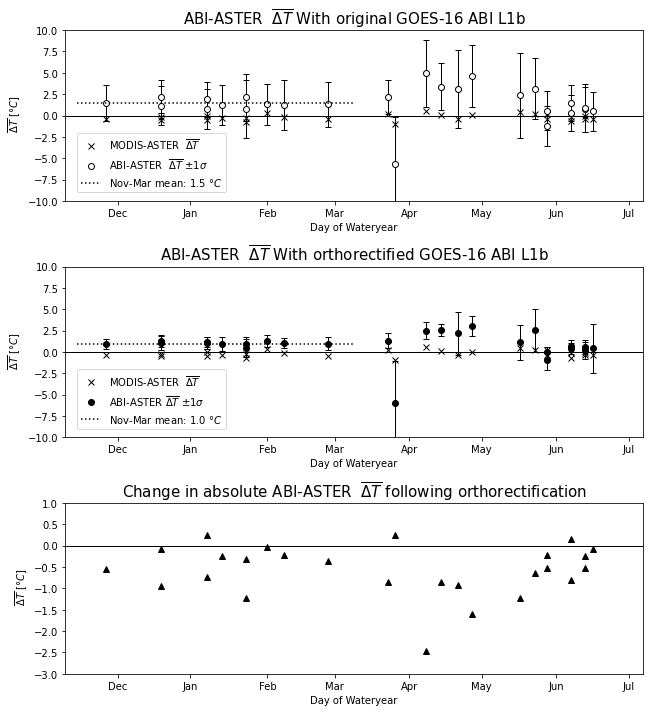

In [181]:
# month of water year
def month_of_wy(month):
    ''' return month of wateryear (starting with October = 1, ending with September = 12)
    based on: https://stackoverflow.com/questions/52105804/how-to-convert-calendar-year-to-water-year-in-pandas'''
    if month>=10:
        return(month-9)
    else:
        return(month+3)
    
def day_of_wy(dayofyear):
    ''' return day of wateryear (starting with October 1st (274) = 1, ending with September 30th (273) = 365)
    based on: https://stackoverflow.com/questions/52105804/how-to-convert-calendar-year-to-water-year-in-pandas
    https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html
    CAUTION: Leap days are going to spill over'''
    if dayofyear>=274:
        return(dayofyear-273)
    else:
        return(dayofyear+92)


df_original_tb['doy'] = df_original_tb.index.dayofyear
df_ortho_tb['doy'] = df_ortho_tb.index.dayofyear 
df_change_tb['doy'] = df_change_tb.index.dayofyear 

df_original_tb['month_of_wy'] = [month_of_wy(m) for m in df_original_tb.index.month]
df_ortho_tb['month_of_wy'] = [month_of_wy(m) for m in df_ortho_tb.index.month]
df_change_tb['month_of_wy'] = [month_of_wy(m) for m in df_change_tb.index.month]

df_original_tb['day_of_wy'] = [day_of_wy(doy) for doy in df_original_tb.index.dayofyear]
df_ortho_tb['day_of_wy'] = [day_of_wy(doy) for doy in df_ortho_tb.index.dayofyear]
df_change_tb['day_of_wy'] = [day_of_wy(doy) for doy in df_change_tb.index.dayofyear]

fig, axes = plt.subplots(3,1,figsize=(9,10), tight_layout=True, sharey=False)
                           #gridspec_kw={'width_ratios': [3, 1]})
ax = axes.flatten()

c = 'k'

### Original stats
df_original_tb.plot(x='day_of_wy', y='ast_mod_mean_diff', linestyle='none', marker='x',  mfc='w', mec=c, ax=ax[0], label='MODIS-ASTER  $\overline{\Delta T}$')
df_original_tb.plot(x='day_of_wy', y='ast_goes_mean_diff', linestyle='none', marker='o', mfc='w', mec=c,  ax=ax[0], label='ABI-ASTER  $\overline{\Delta T}$ $\pm 1 \sigma$')
ax[0].errorbar(x=df_original_tb.day_of_wy, 
               y=df_original_tb.ast_goes_mean_diff, 
               yerr=df_original_tb.ast_goes_std_diff,
               fmt='none', #label='ABI-ASTER $\pm 1 \sigma$', 
               color=c, linewidth=1, capsize=3)
# plot a line for the mean value in the early snow season months
ax[0].plot([45, 160], 
           [df_original_tb.where(df_original_tb.month_of_wy<=4).ast_goes_mean_diff.mean(), df_original_tb.where(df_original_tb.month_of_wy<=4).ast_goes_mean_diff.mean()],
           linestyle=':',
           color='k',
           label='Nov-Mar mean: {} $\degree C$'.format(np.round(df_original_tb.where(df_original_tb.month_of_wy<=4).ast_goes_mean_diff.mean(),1)))



### Orthorectified stats
df_ortho_tb.plot(x='day_of_wy', y='ast_mod_mean_diff', linestyle='none', marker='x',  mfc='w', mec=c, ax=ax[1], label='MODIS-ASTER  $\overline{\Delta T}$')
df_ortho_tb.plot(x='day_of_wy', y='ast_goes_mean_diff', linestyle='none', marker='o',  c=c, ax=ax[1], label='ABI-ASTER $\overline{\Delta T}$ $\pm 1 \sigma$')
ax[1].errorbar(x=df_ortho_tb.day_of_wy, 
               y=df_ortho_tb.ast_goes_mean_diff, 
               yerr=df_ortho_tb.ast_goes_std_diff,
               fmt='none', #label='ABI-ASTER $\pm 1 \sigma$', 
               color=c, linewidth=1, capsize=3)
# plot a line for the mean value in the early snow season months
ax[1].plot([45, 160], 
           [df_ortho_tb.where(df_ortho_tb.month_of_wy<=4).ast_goes_mean_diff.mean(), df_ortho_tb.where(df_ortho_tb.month_of_wy<=4).ast_goes_mean_diff.mean()],
           linestyle=':',
           color='k',
           label='Nov-Mar mean: {} $\degree C$'.format(np.round(df_ortho_tb.where(df_ortho_tb.month_of_wy<=4).ast_goes_mean_diff.mean(),1)))



### Change (original - ortho) stats
# skipping MODIS - ASTER since there is no change
df_change_tb.plot(x='day_of_wy', y='ast_goes_abs_mean_diff', linestyle='none', marker='^',  c=c, ax=ax[2], 
                                     #label='Orthorectified - Original'
                                    )


ax[0].set_title('ABI-ASTER  $\overline{\Delta T}$ With original GOES-16 ABI L1b',fontsize=15)
ax[0].axhline(0,c='k',linewidth=1)
ax[1].set_title('ABI-ASTER  $\overline{\Delta T}$ With orthorectified GOES-16 ABI L1b',fontsize=15)
ax[1].axhline(0,c='k',linewidth=1)
ax[2].set_title('Change in absolute ABI-ASTER  $\overline{\Delta T}$ following orthorectification',fontsize=15)
#ax[2].set_ylim(-3,3)
ax[2].axhline(0,c='k',linestyle='-',linewidth=1)

for this_ax in ax:
    this_ax.set_ylim(-10,10)
    this_ax.legend(loc=(.02,.05))
    this_ax.set_xlabel('Day of Wateryear')
    this_ax.set_ylabel(' $\overline{\Delta T}$ [$\degree C$]')
    this_ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 
                             'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',])
    this_ax.set_xticks([1, 32, 62, 92, 124, 152, 183, 213, 244, 274, 305, 336])
    this_ax.set_xlim(40,280)

ax[2].set_ylim(-3,1)
ax[2].legend().remove()

In [150]:
print('What is the mean difference between MODIS and ASTER image pairs within Nov-Mar (the baseline)?\n{}'.format(df_original_tb.where(df_original_tb.month_of_wy<=4).ast_mod_mean_diff.mean()))
print('What is the mean difference between GOES and ASTER image pairs within Nov-Mar BEFORE orthorectifying?\n{}'.format(df_original_tb.where(df_original_tb.month_of_wy<=4).ast_goes_mean_diff.mean()))
print('What is the mean difference between GOES and ASTER image pairs within Nov-Mar AFTER orthorectifying?\n{}'.format(df_ortho_tb.where(df_original_tb.month_of_wy<=4).ast_goes_mean_diff.mean()))
print('\n')

print('What is the mean difference between MODIS and ASTER image pairs within Apr-Jun (the baseline)?\n{}'.format(df_original_tb.where(df_original_tb.month_of_wy>5).ast_mod_mean_diff.mean()))
print('What is the mean difference between GOES and ASTER image pairs within Apr-Jun BEFORE orthorectifying?\n{}'.format(df_original_tb.where(df_original_tb.month_of_wy>5).ast_goes_mean_diff.mean()))
print('What is the mean difference between GOES and ASTER image pairs within Apr-Jun AFTER orthorectifying?\n{}'.format(df_ortho_tb.where(df_original_tb.month_of_wy>5).ast_goes_mean_diff.mean()))
print('\n')

What is the mean difference between MODIS and ASTER image pairs within Nov-Mar (the baseline)?
-0.35809592905293636
What is the mean difference between GOES and ASTER image pairs within Nov-Mar BEFORE orthorectifying?
1.4567893195392498
What is the mean difference between GOES and ASTER image pairs within Nov-Mar AFTER orthorectifying?
0.9791897575509995


What is the mean difference between MODIS and ASTER image pairs within Apr-Jun (the baseline)?
-0.11883577219302704
What is the mean difference between GOES and ASTER image pairs within Apr-Jun BEFORE orthorectifying?
1.4167663982992431
What is the mean difference between GOES and ASTER image pairs within Apr-Jun AFTER orthorectifying?
0.7036763960392837




**Coloring by year**

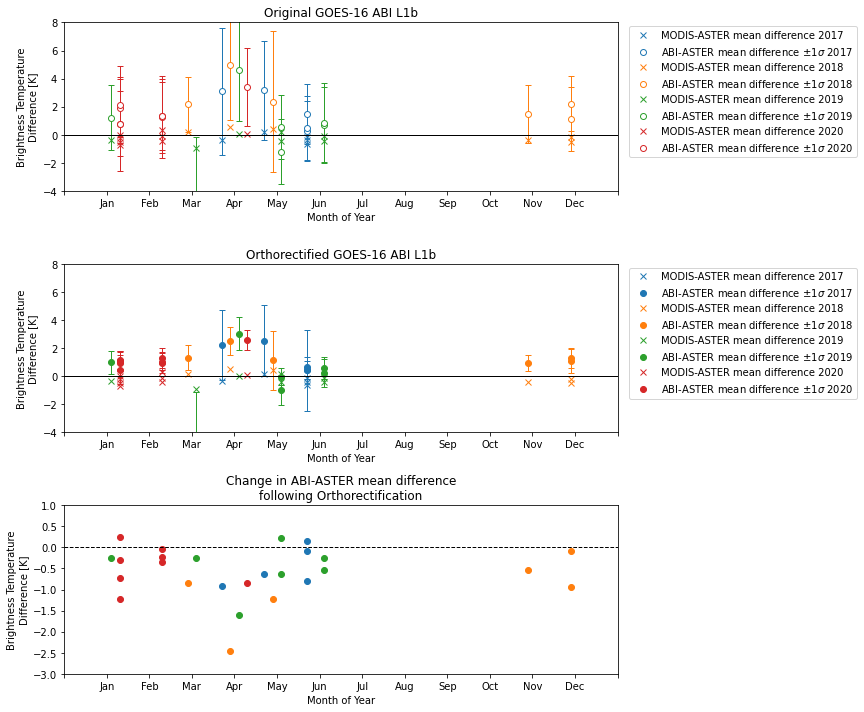

In [17]:
from matplotlib.pyplot import cm
color = cm.tab10(np.linspace(0, 1, 10))

df_original_tb['monthoffset'] = df_original_tb.index.month + ((df_original_tb.index.year - 2018.5) * 0.2)
df_ortho_tb['monthoffset'] = df_ortho_tb.index.month + ((df_ortho_tb.index.year - 2018.5) * 0.2)
df_change_tb['monthoffset'] = df_change_tb.index.month + ((df_change_tb.index.year - 2018.5) * 0.2)

fig, axes = plt.subplots(3,1,figsize=(12,10), tight_layout=True, sharey=False)
                           #gridspec_kw={'width_ratios': [3, 1]})
ax = axes.flatten()
i=0
for yr in df_original_tb.index.year.unique():
    df_original_tb_yr = df_original_tb.loc[df_original_tb.index.year == yr]
    df_ortho_tb_yr = df_ortho_tb.loc[df_ortho_tb.index.year == yr]
    df_change_tb_yr = df_change_tb.loc[df_change_tb.index.year == yr]
    
    c = color[i]
    
    ### Original stats
    df_original_tb_yr.plot(x='monthoffset', y='ast_mod_mean_diff', linestyle='none', marker='x',  mfc='w', mec=c, ax=ax[0], label='MODIS-ASTER mean difference {}'.format(yr))
    df_original_tb_yr.plot(x='monthoffset', y='ast_goes_mean_diff', linestyle='none', marker='o', mfc='w', mec=c,  ax=ax[0], label='ABI-ASTER mean difference $\pm 1 \sigma$ {}'.format(yr))
    ax[0].errorbar(x=df_original_tb_yr.monthoffset, 
                   y=df_original_tb_yr.ast_goes_mean_diff, 
                   yerr=df_original_tb_yr.ast_goes_std_diff,
                   fmt='none', #label='ABI-ASTER $\pm 1 \sigma$', 
                   color=c, linewidth=1, capsize=3)

    
    ### Orthorectified stats
    df_ortho_tb_yr.plot(x='monthoffset', y='ast_mod_mean_diff', linestyle='none', marker='x',  mfc='w', mec=c, ax=ax[1], label='MODIS-ASTER mean difference {}'.format(yr))
    df_ortho_tb_yr.plot(x='monthoffset', y='ast_goes_mean_diff', linestyle='none', marker='o',  c=c, ax=ax[1], label='ABI-ASTER mean difference $\pm 1 \sigma$ {}'.format(yr))
    ax[1].errorbar(x=df_ortho_tb_yr.monthoffset, 
                   y=df_ortho_tb_yr.ast_goes_mean_diff, 
                   yerr=df_ortho_tb_yr.ast_goes_std_diff,
                   fmt='none', #label='ABI-ASTER $\pm 1 \sigma$', 
                   color=c, linewidth=1, capsize=3)

    
    
    
    ### Change (original - ortho) stats
    # skipping MODIS - ASTER since there is no change
    df_change_tb_yr.plot(x='monthoffset', y='ast_goes_mean_diff', linestyle='none', marker='o',  c=c, ax=ax[2], 
                                         #label='Original - Orthorectified'
                                        )
    i+=1


ax[0].set_title('Original GOES-16 ABI L1b')
ax[0].axhline(0,c='k',linewidth=1)
ax[1].set_title('Orthorectified GOES-16 ABI L1b')
ax[1].axhline(0,c='k',linewidth=1)
ax[2].set_title('Change in ABI-ASTER mean difference\nfollowing Orthorectification')
#ax[2].set_ylim(-3,3)
ax[2].axhline(0,c='k',linestyle='--',linewidth=1)

for this_ax in ax:
    #format_date_ax2(this_ax)
    this_ax.set_ylim(-4,8)
    #this_ax.set_xlim(pd.Timestamp('2017-03-01'),pd.Timestamp('2020-07-01'))
    #this_ax.xaxis_date()
    #this_ax.set_xlim(pd.Timestamp('2017-01-01').month,pd.Timestamp('2020-12-01').month)
    this_ax.legend(loc=(1.02,.2))
    this_ax.set_xlabel('Month of Year')
    this_ax.set_ylabel('Brightness Temperature\nDifference [K]')
    #this_ax.legend(loc='best')
    this_ax.set_xticklabels(['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                            'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''])
    this_ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
    

ax[2].set_ylim(-3,1)
ax[2].legend().remove()

**Histograms**

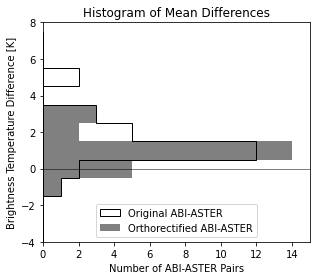

In [18]:
fig, ax = plt.subplots(1,1,figsize=(4.5,4), tight_layout=True, sharey=False)
                           #gridspec_kw={'width_ratios': [3, 1]})

#ax = axes.flatten()

nbins=[x+.5 for x in range(-8,8)]

### Original stats


df_original_tb.ast_goes_mean_diff.hist(ax=ax,
                                      bins=nbins,
                                      orientation='horizontal',
                                      color = '#000000',
                                      fc='none',
                                      ec='k',
                                      histtype='stepfilled',
                                      linestyle='-',
                                      lw=1,
                                      grid=False,
                                      label='Original ABI-ASTER')

### Orthorectified stats


df_ortho_tb.ast_goes_mean_diff.hist(ax=ax,
                                      bins=nbins,
                                      orientation='horizontal',
                                      color = '#000000',
                                      fc='grey',
                                      ec='none',
                                      histtype='stepfilled',
                                      lw=1,
                                      grid=False,
                                      label='Orthorectified ABI-ASTER',
                                      zorder=-1)

#### MODIS for comparison

#df_ortho_tb.ast_mod_mean_diff.hist(ax=ax,
#                                      bins=nbins,
#                                      orientation='horizontal',
#                                      color = '#000000',
#                                      fc='none',
#                                      ec='k',
#                                      histtype='stepfilled',
#                                      lw=1,
#                                      grid=False,
#                                      label='MODIS-ASTER mean difference',
#                                      zorder=-1)

ax.axhline(0,c='k',linestyle='-',linewidth=0.5)
ax.set_xlim(0,15)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_ylim(-4,8)
ax.set_xlabel('Number of ABI-ASTER Pairs')
ax.set_ylabel('Brightness Temperature Difference [K]')
ax.set_title('Histogram of Mean Differences')
plt.legend(loc="lower center")

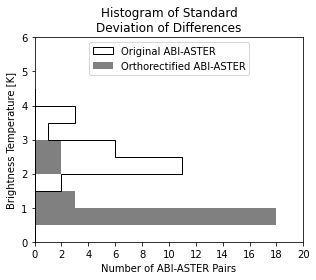

In [19]:
fig, ax = plt.subplots(1,1,figsize=(4.5,4), tight_layout=True, sharey=False)
                           #gridspec_kw={'width_ratios': [3, 1]})

#ax = axes.flatten()

nbins=[x*.5 for x in range(0,10)]

### Original stats


df_original_tb.ast_goes_std_diff.hist(ax=ax,
                                      bins=nbins,
                                      orientation='horizontal',
                                      color = '#000000',
                                      fc='none',
                                      ec='k',
                                      histtype='stepfilled',
                                      linestyle='-',
                                      lw=1,
                                      grid=False,
                                      label='Original ABI-ASTER')

### Orthorectified stats


df_ortho_tb.ast_goes_std_diff.hist(ax=ax,
                                      bins=nbins,
                                      orientation='horizontal',
                                      color = '#000000',
                                      fc='grey',
                                      ec='none',
                                      histtype='stepfilled',
                                      lw=1,
                                      grid=False,
                                      label='Orthorectified ABI-ASTER',
                                      zorder=-1)

#### MODIS for comparison

#df_ortho_tb.ast_mod_mean_diff.hist(ax=ax,
#                                      bins=nbins,
#                                      orientation='horizontal',
#                                      color = '#000000',
#                                      fc='none',
#                                      ec='k',
#                                      histtype='stepfilled',
#                                      lw=1,
#                                      grid=False,
#                                      label='MODIS-ASTER mean difference',
#                                      zorder=-1)

#ax.axhline(0,c='k',linestyle='-',linewidth=0.5)
ax.set_xlim(0,20)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_ylim(0,6)
ax.set_xlabel('Number of ABI-ASTER Pairs')
ax.set_ylabel('Brightness Temperature [K]')
ax.set_title('Histogram of Standard\nDeviation of Differences')
plt.legend(loc="upper center")

In [20]:
df_original_tb['day_night'] = ['day' if h>15 else 'night' for h in df_original_tb.index.hour]
df_ortho_tb['day_night'] = ['day' if h>15 else 'night' for h in df_ortho_tb.index.hour]
df_change_tb['day_night'] = ['day' if h>15 else 'night' for h in df_change_tb.index.hour]

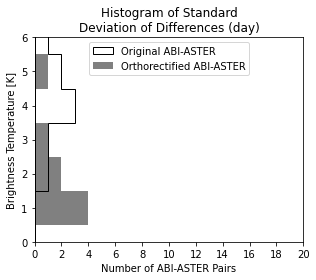

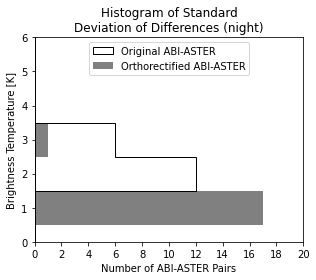

In [21]:

for dn in ['day', 'night']:

    fig, ax = plt.subplots(1,1,figsize=(4.5,4), tight_layout=True, sharey=False)
                               #gridspec_kw={'width_ratios': [3, 1]})
    
    #ax = axes.flatten()
    
    nbins=[x+.5 for x in range(-8,8)]
    
    ### Original stats
    
    df_original_tb.where(df_original_tb.day_night==dn).ast_goes_std_diff.hist(
                                          ax=ax,
                                          bins=nbins,
                                          orientation='horizontal',
                                          color = '#000000',
                                          fc='none',
                                          ec='k',
                                          histtype='stepfilled',
                                          linestyle='-',
                                          lw=1,
                                          grid=False,
                                          label='Original ABI-ASTER')
    
    ### Orthorectified stats
    df_ortho_tb.where(df_ortho_tb.day_night==dn).ast_goes_std_diff.hist(
                                          ax=ax,
                                          bins=nbins,
                                          orientation='horizontal',
                                          color = '#000000',
                                          fc='grey',
                                          ec='none',
                                          histtype='stepfilled',
                                          lw=1,
                                          grid=False,
                                          label='Orthorectified ABI-ASTER',
                                          zorder=-1)
    
    ax.set_xlim(0,20)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.set_ylim(0,6)
    ax.set_xlabel('Number of ABI-ASTER Pairs')
    ax.set_ylabel('Brightness Temperature [K]')
    ax.set_title('Histogram of Standard\nDeviation of Differences ({})'.format(dn))
    plt.legend(loc="upper center")

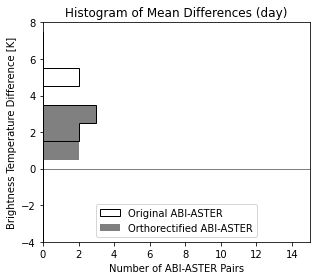

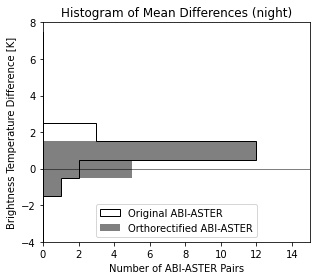

In [22]:

for dn in ['day', 'night']:

    fig, ax = plt.subplots(1,1,figsize=(4.5,4), tight_layout=True, sharey=False)
                               #gridspec_kw={'width_ratios': [3, 1]})
    
    #ax = axes.flatten()
    
    nbins=[x+.5 for x in range(-8,8)]
    
    ### Original stats
    
    df_original_tb.where(df_original_tb.day_night==dn).ast_goes_mean_diff.hist(
                                          ax=ax,
                                          bins=nbins,
                                          orientation='horizontal',
                                          color = '#000000',
                                          fc='none',
                                          ec='k',
                                          histtype='stepfilled',
                                          linestyle='-',
                                          lw=1,
                                          grid=False,
                                          label='Original ABI-ASTER')
    
    ### Orthorectified stats
    df_ortho_tb.where(df_ortho_tb.day_night==dn).ast_goes_mean_diff.hist(
                                          ax=ax,
                                          bins=nbins,
                                          orientation='horizontal',
                                          color = '#000000',
                                          fc='grey',
                                          ec='none',
                                          histtype='stepfilled',
                                          lw=1,
                                          grid=False,
                                          label='Orthorectified ABI-ASTER',
                                          zorder=-1)
    
    ax.axhline(0,c='k',linestyle='-',linewidth=0.5)
    ax.set_xlim(0,15)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.set_ylim(-4,8)
    ax.set_xlabel('Number of ABI-ASTER Pairs')
    ax.set_ylabel('Brightness Temperature Difference [K]')
    ax.set_title('Histogram of Mean Differences ({})'.format(dn))
    plt.legend(loc="lower center")

---

Is GOES biased warmer than ASTER especially when trees (tair proxy for trees) are much warmer than the snow surface? Assuming here that GOES is seeing more trees than ASTER is seeing due to its off-nadir view angle..

Read in the ground based data timeseries for Gaylor Pit and CUES sites

In [23]:
tuol_df = pd.read_pickle('data/goes-tuolumne_2017-2020.pkl')
tuol_df['timeUTC'] = tuol_df.index + pd.Timedelta(hours=8)
tuol_df.set_index('timeUTC',inplace=True)
tuol_ds = tuol_df.to_xarray().squeeze()

cues_df = pd.read_pickle('data/goes-cues_2017-2020.pkl')
cues_df['timeUTC'] = cues_df.index + pd.Timedelta(hours=8)
cues_df.set_index('timeUTC',inplace=True)
cues_ds = cues_df.to_xarray().squeeze()

Select Tss and Tair from both sites for the date/time of the GOES/MODIS/ASTER images for comparison

In [24]:
_tuol_ds = tuol_ds.sel(timeUTC=df_ortho_tb.index.values, method='nearest')
tuol_tss = _tuol_ds.tss
tuol_tair = _tuol_ds.air_temp_c  
tuol_tdelta = tuol_tair - tuol_tss
_cues_ds = cues_ds.sel(timeUTC=df_ortho_tb.index.values, method='nearest')
cues_tss = _cues_ds['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)']
cues_tair = _cues_ds['Platform temperature; platform temperature/relative humidity; (degrees Celsius)']
cues_tdelta = cues_tair - cues_tss

**Plot tss, tair, tdelta, for both sites against GOES-ASTER difference to see if there is a pattern somewhere**

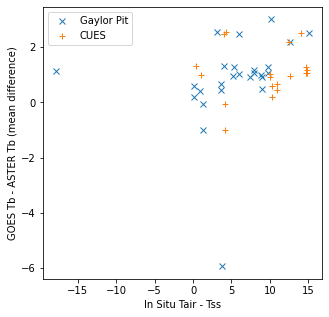

In [25]:
from scipy import stats

plt.figure(figsize=(5,5))
plt.plot(tuol_tdelta, df_ortho_tb.ast_goes_mean_diff, linestyle='none', marker='x', label='Gaylor Pit')
plt.plot(cues_tdelta, df_ortho_tb.ast_goes_mean_diff, linestyle='none', marker='+', label='CUES')

#x = np.array([tuol_tdelta.values, cues_tdelta.values]).ravel()
#y = np.array([df_ortho_tb.ast_goes_mean_diff.values, df_ortho_tb.ast_goes_mean_diff.values]).ravel()
#_x = x[~np.isnan(x) & ~np.isnan(y)]
#_y = y[~np.isnan(x) & ~np.isnan(y)]
#x = _x[_x>0]
#y = _y[_x>0]
#m, b, r, p, se = stats.linregress(x,y)
#plt.plot(x, m*x + b, linestyle='-', color='r', label=f'r^2={r}')

plt.xlabel('In Situ Tair - Tss')
plt.ylabel('GOES Tb - ASTER Tb (mean difference)')
plt.legend()

My thought here was that when Tair >> Tss then GOES >> ASTER, but I'm not really convinced just looking at this plot that there's a clear relationship.

**Plot MODIS baseline stats only**

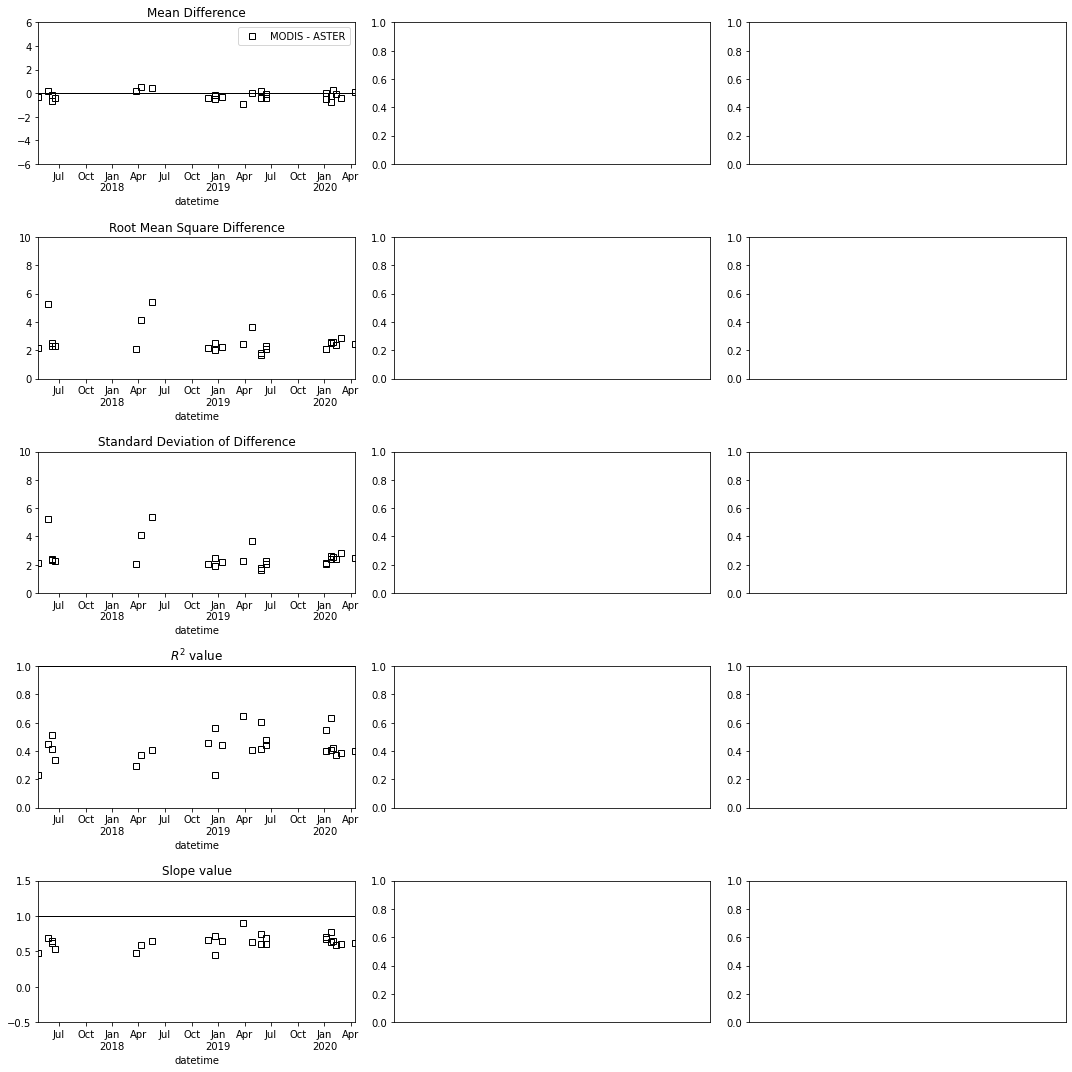

In [26]:
fig, axes = plt.subplots(5,3,figsize=(15,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[0], label='MODIS - ASTER')
ax[0].set_title('Mean Difference')
ax[0].set_ylim(-6,6)
ax[0].axhline(0,c='k',linewidth=1)
ax[0].legend()

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[3], label='MODIS - ASTER')
ax[3].set_title('Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='k',linewidth=1)

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[6], label='MODIS - ASTER')
ax[6].set_title('Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[9], label='MODIS : ASTER')
ax[9].set_title('$R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='k',linewidth=1)

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[12], label='MODIS : ASTER')
ax[12].set_title('Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='k',linewidth=1)



for this_ax in ax:
    format_date_ax(this_ax)
    #this_ax.legend(loc='best')
